In [2]:
from __future__ import print_function
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import cv2
from IPython.display import HTML, YouTubeVideo
import matplotlib.patches as patches
from matplotlib.lines import Line2D

### Enter your name below and run the cell:

Individual cells can be run with `Ctrl` + `Enter`

https://www.khanacademy.org/math/statistics-probability/describing-relationships-quantitative-data/more-on-regression/v/squared-error-of-regression-line

*Note: All Khan Academy content is available for free at khanacademy.org*

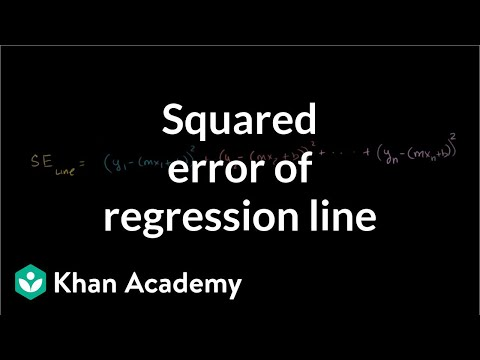

In [3]:
YouTubeVideo('6OvhLPS7rj4', width=560, height=315)

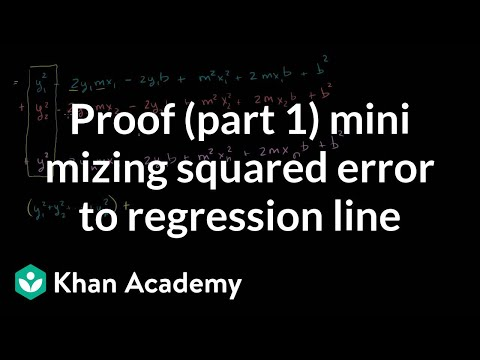

In [4]:
YouTubeVideo('mIx2Oj5y9Q8', width=560, height=315)

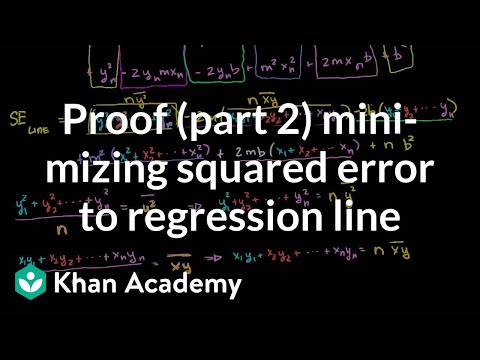

In [5]:
YouTubeVideo('f6OnoxctvUk', width=560, height=315)

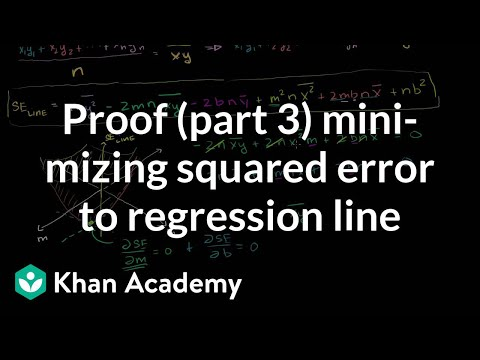

In [6]:
YouTubeVideo('u1HhUB3NP8g', width=560, height=315)

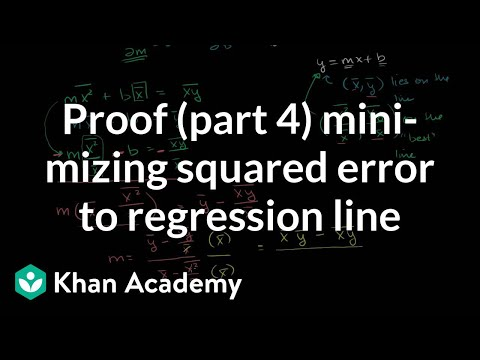

In [7]:
YouTubeVideo('8RSTQl0bQuw', width=560, height=315)

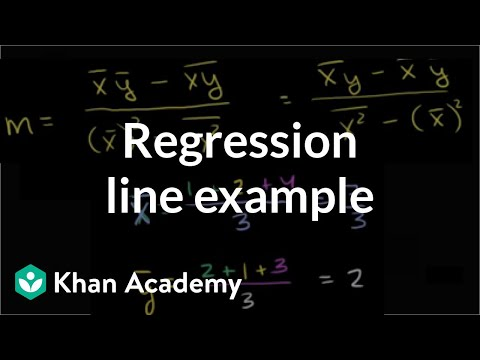

In [8]:
YouTubeVideo('GAmzwIkGFgE', width=560, height=315)

**The last video is optional**

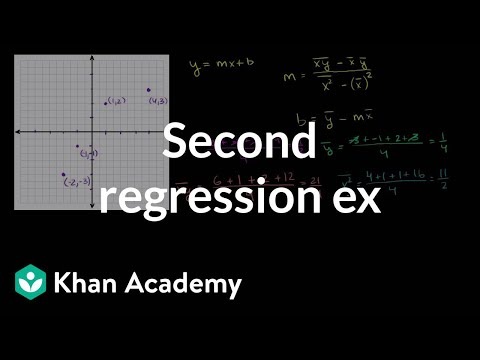

In [9]:
YouTubeVideo('ww_yT9ckPWw', width=560, height=315)

(215, 209)


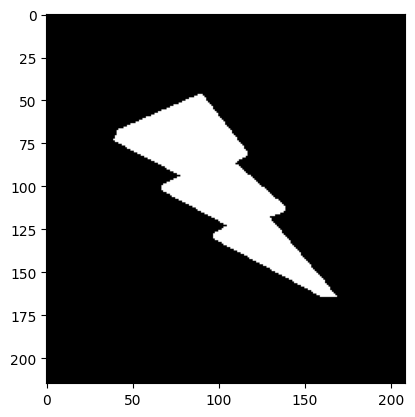

In [10]:
lightningbolt = cv2.imread('shapes/lightningbolt.png', cv2.IMREAD_GRAYSCALE)
_, lightningbolt = cv2.threshold(lightningbolt,150,255,cv2.THRESH_BINARY)
print(lightningbolt.shape)
fig,ax = plt.subplots()
ax.imshow(lightningbolt, cmap='gray');
#check(1)

In [11]:
np.argwhere?

Signature:       np.argwhere(a)
Call signature:  np.argwhere(*args, **kwargs)
Type:            _ArrayFunctionDispatcher
String form:     <function argwhere at 0x7751a41c7d80>
File:            /usr/local/python/3.12.1/lib/python3.12/site-packages/numpy/_core/numeric.py
Docstring:      
Find the indices of array elements that are non-zero, grouped by element.

Parameters
----------
a : array_like
    Input data.

Returns
-------
index_array : (N, a.ndim) ndarray
    Indices of elements that are non-zero. Indices are grouped by element.
    This array will have shape ``(N, a.ndim)`` where ``N`` is the number of
    non-zero items.

See Also
--------
where, nonzero

Notes
-----
``np.argwhere(a)`` is almost the same as ``np.transpose(np.nonzero(a))``,
but produces a result of the correct shape for a 0D array.

The output of ``argwhere`` is not suitable for indexing arrays.
For this purpose use ``nonzero(a)`` instead.

Examples
--------
>>> import numpy as np
>>> x = np.arange(6).reshape(2,3

In [12]:
bolt = np.argwhere(lightningbolt)
bolt

array([[ 47,  88],
       [ 47,  89],
       [ 47,  90],
       ...,
       [164, 166],
       [164, 167],
       [164, 168]], shape=(4880, 2))

## Linear Regression

$$m = \frac{\bar{x}\bar{y} - \overline{xy}}{(\bar{x})^2 - \overline{x^2}}$$

$$b = \bar{y} - m\bar{x}$$

## Question: how can we extract the xs and ys separately from the result of argwhere?

Hint: review numpy slicing by columns and rows

In [13]:
# TODO
# Your answer here

## Question: Why would we want to convert x and y points from int values to floats?

In [14]:
# TODO
# Your answer here
# Float gives us more precise value

In [1]:
def calculate_regression(points): # input is the result of np.argwhere
    # convert points to float
    points = point.astype(float) 
    
    xs = bolt[:, 1]
    ys = bolt[:, 0]
    x_mean = np.mean(xs)
    y_mean = np.mean(ys)

    xy_mean = np.mean(x_mean+y_mean)

    x_squared_mean = np.mean(x_values ** 2)

    m = ((x_mean*y_mean)-xy_mean) / ((x_mean**2)-x_squared_mean)
    
    b = (y_mean) - (m * x_mean)

    return (m,b)

The intercept we calculated, $b$, may be outside of the pixel space of the image, so we must find two points inside of pixel space, $(x_1, y_1)$ and $(x2, y2)$ which will allow us to plot our regression line on the image. It may be best to choose points on the regression line which also occur on the boundaries/extrema of the image.

In [ ]:
def find_inliers(m, b, shape):
    max_x = shape[1]
    max_y = shape[0]
    points = []

    y_left = b
    points.append((0, y_left))

    y_right = m * max_x + b
    points.append((max_x, y_right))

    x_top = -b / m
    points.append((x_top, 0))

    x_bottom = (max_y - b) / m
    points.append((x_bottom, max_y))

    x1, y1, x2, y2 = points[0][0], points[0][1], points[1][0], points[1][1]
    return x1, y1, x2, y2

    x1, y1, x2, y2 = two_points[0][0], two_points[0][1], two_points[1][0], two_points[1][1] # TODO
    # raise NotImplementedError #TODO

In [ ]:
star = cv2.imread('shapes/squishedstar.png', cv2.IMREAD_GRAYSCALE)
print(star.shape)

_, star = cv2.threshold(star,125,255,cv2.THRESH_BINARY)
fig,ax = plt.subplots()
ax.imshow(star, cmap='gray');

In [ ]:
m,b = calculate_regression(np.argwhere(star))
_ = find_inliers(m,b, star.shape)

In [ ]:
# below is an example of how to draw a random line from (10,25) to (10,55)
# TODO: replace this with the result of find_inliers
# -- pay attention to the directions of the x and y axes 
#    in image space, row-column space, and cartesian space
# Look at the help function for Line2D below

fig,ax = plt.subplots()
ax.imshow(star, cmap='gray');
regression = Line2D([10,25],[10,55], color='lime')
ax.add_line(regression);

In [ ]:
Line2D?

## TODO

1. Run your linear regression algorithm on the following images. 
2. Plot each of the results. 
3. Include each result in your submitted PDF.

In [ ]:
lightningbolt      = cv2.imread('shapes/lightningbolt.png', cv2.IMREAD_GRAYSCALE)
blob               = cv2.imread('shapes/blob.png', cv2.IMREAD_GRAYSCALE)
star               = cv2.imread('shapes/star.png', cv2.IMREAD_GRAYSCALE)
squishedstar       = cv2.imread('shapes/squishedstar.png', cv2.IMREAD_GRAYSCALE)
squishedturnedstar = cv2.imread('shapes/squishedturnedstar.png', cv2.IMREAD_GRAYSCALE)
letterj            = cv2.imread('shapes/letterj.png', cv2.IMREAD_GRAYSCALE)

images = [lightningbolt, blob, star, squishedstar, squishedturnedstar, letterj]

for img in images:
    _, img = cv2.threshold(img,125,255,cv2.THRESH_BINARY)
    m,b = calculate_regression(np.argwhere(img))
    x1, y1, x2, y2 = find_inliers(m,b, img.shape)
    print(x1, y1, x2, y2)
    fig,ax = plt.subplots()
    ax.imshow(img, cmap='gray');
    regression = Line2D([x1,x2],[y1,y2], color='lime')
    ax.add_line(regression);

## When you are done:

You should have six images with regression lines plotted on top of them.

1. Double-check that you filled in your name at the top of the notebook!
2. Click `File` -> `Export Notebook As` -> `PDF`
3. Email the PDF to `YOURTEAMNAME@beaver.works` 

## Stretch goal

*Implement a machine learning algorithm!*

**Ran**dom **Sa**mple **C**onsensus, commonly referred to as *RANSAC*, is one of the most widely used machine learning algorithms. In essence, it is a 'guess and check' algorithm. Take a small random sample of your data - two points in this case. Next, define a line through those two points. After doing so, count the number of *inliers*, or points closest to that line (euclidean distance is one way to do this).

https://en.wikipedia.org/wiki/Random_sample_consensus

Implement RANSAC for linear regression, and run it on all of your images.